# DATA CHALLENGE

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

On charge nos données tout d'abord : 

In [2]:
X_train = pd.read_csv("Downloads/Xtrain_hgcGIrA.csv")
X_test = pd.read_csv("Downloads/X_test.csv")

In [3]:
X_train.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


# 1) Data analysis

Vérifier si il y a des lignes avec des valeurs NA

In [4]:
print(X_train.isnull().sum())
X_train.shape

date              0
train             0
way               0
station           0
hour           3204
composition       0
p1q0           2052
p2q0           4145
p3q0           6184
p0q1           3202
p0q2           6399
p0q3           9592
dtype: int64


(31119, 12)

On remarque un grand nombre de valeurs manquantes, il faudra donc adopter une stratégie pour les remplir. Cela sera étudié et implémenté à la section Filling missing values

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31119 entries, 0 to 31118
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31119 non-null  object 
 1   train        31119 non-null  int64  
 2   way          31119 non-null  int64  
 3   station      31119 non-null  object 
 4   hour         27915 non-null  object 
 5   composition  31119 non-null  int64  
 6   p1q0         29067 non-null  float64
 7   p2q0         26974 non-null  float64
 8   p3q0         24935 non-null  float64
 9   p0q1         27917 non-null  float64
 10  p0q2         24720 non-null  float64
 11  p0q3         21527 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.8+ MB


Notre X_train se compose donc de 11 colonnes dont 3 sont de type object (plus précisemment de type string, certains modèles de machine learning/ DL 
n'acceptent que des valeurs réelles, on veillera donc à les remplacer avant de les utiliser comme argument. On commencera tout d'abord par examiner 
les valeurs uniques des variables catégoriques.
                                                                        

In [6]:
stations = X_train['station'].values
stations = np.unique(stations)
stations

array(['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK',
       'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV',
       'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG',
       'BH', 'BI', 'BJ'], dtype=object)

In [24]:
pd.DataFrame(data = X_train['hour']).value_counts()

hour    
07:00:00    10064
08:00:00    10028
06:00:00     4995
09:00:00     2826
11:00:00        2
Name: count, dtype: int64

In [7]:
print("X_train " ,X_train['way'].value_counts())
print("X_test " ,X_test['way'].value_counts())


X_train  way
0    31119
Name: count, dtype: int64
X_test  way
0    13752
Name: count, dtype: int64


-> 5 valeurs différentes pour la colonne heure 

In [8]:
print("X_train " ,X_train['composition'].value_counts())
print("X_test " ,X_test['composition'].value_counts())


X_train  composition
2    31108
1       11
Name: count, dtype: int64
X_test  composition
2    13752
Name: count, dtype: int64


# 2) Visualization


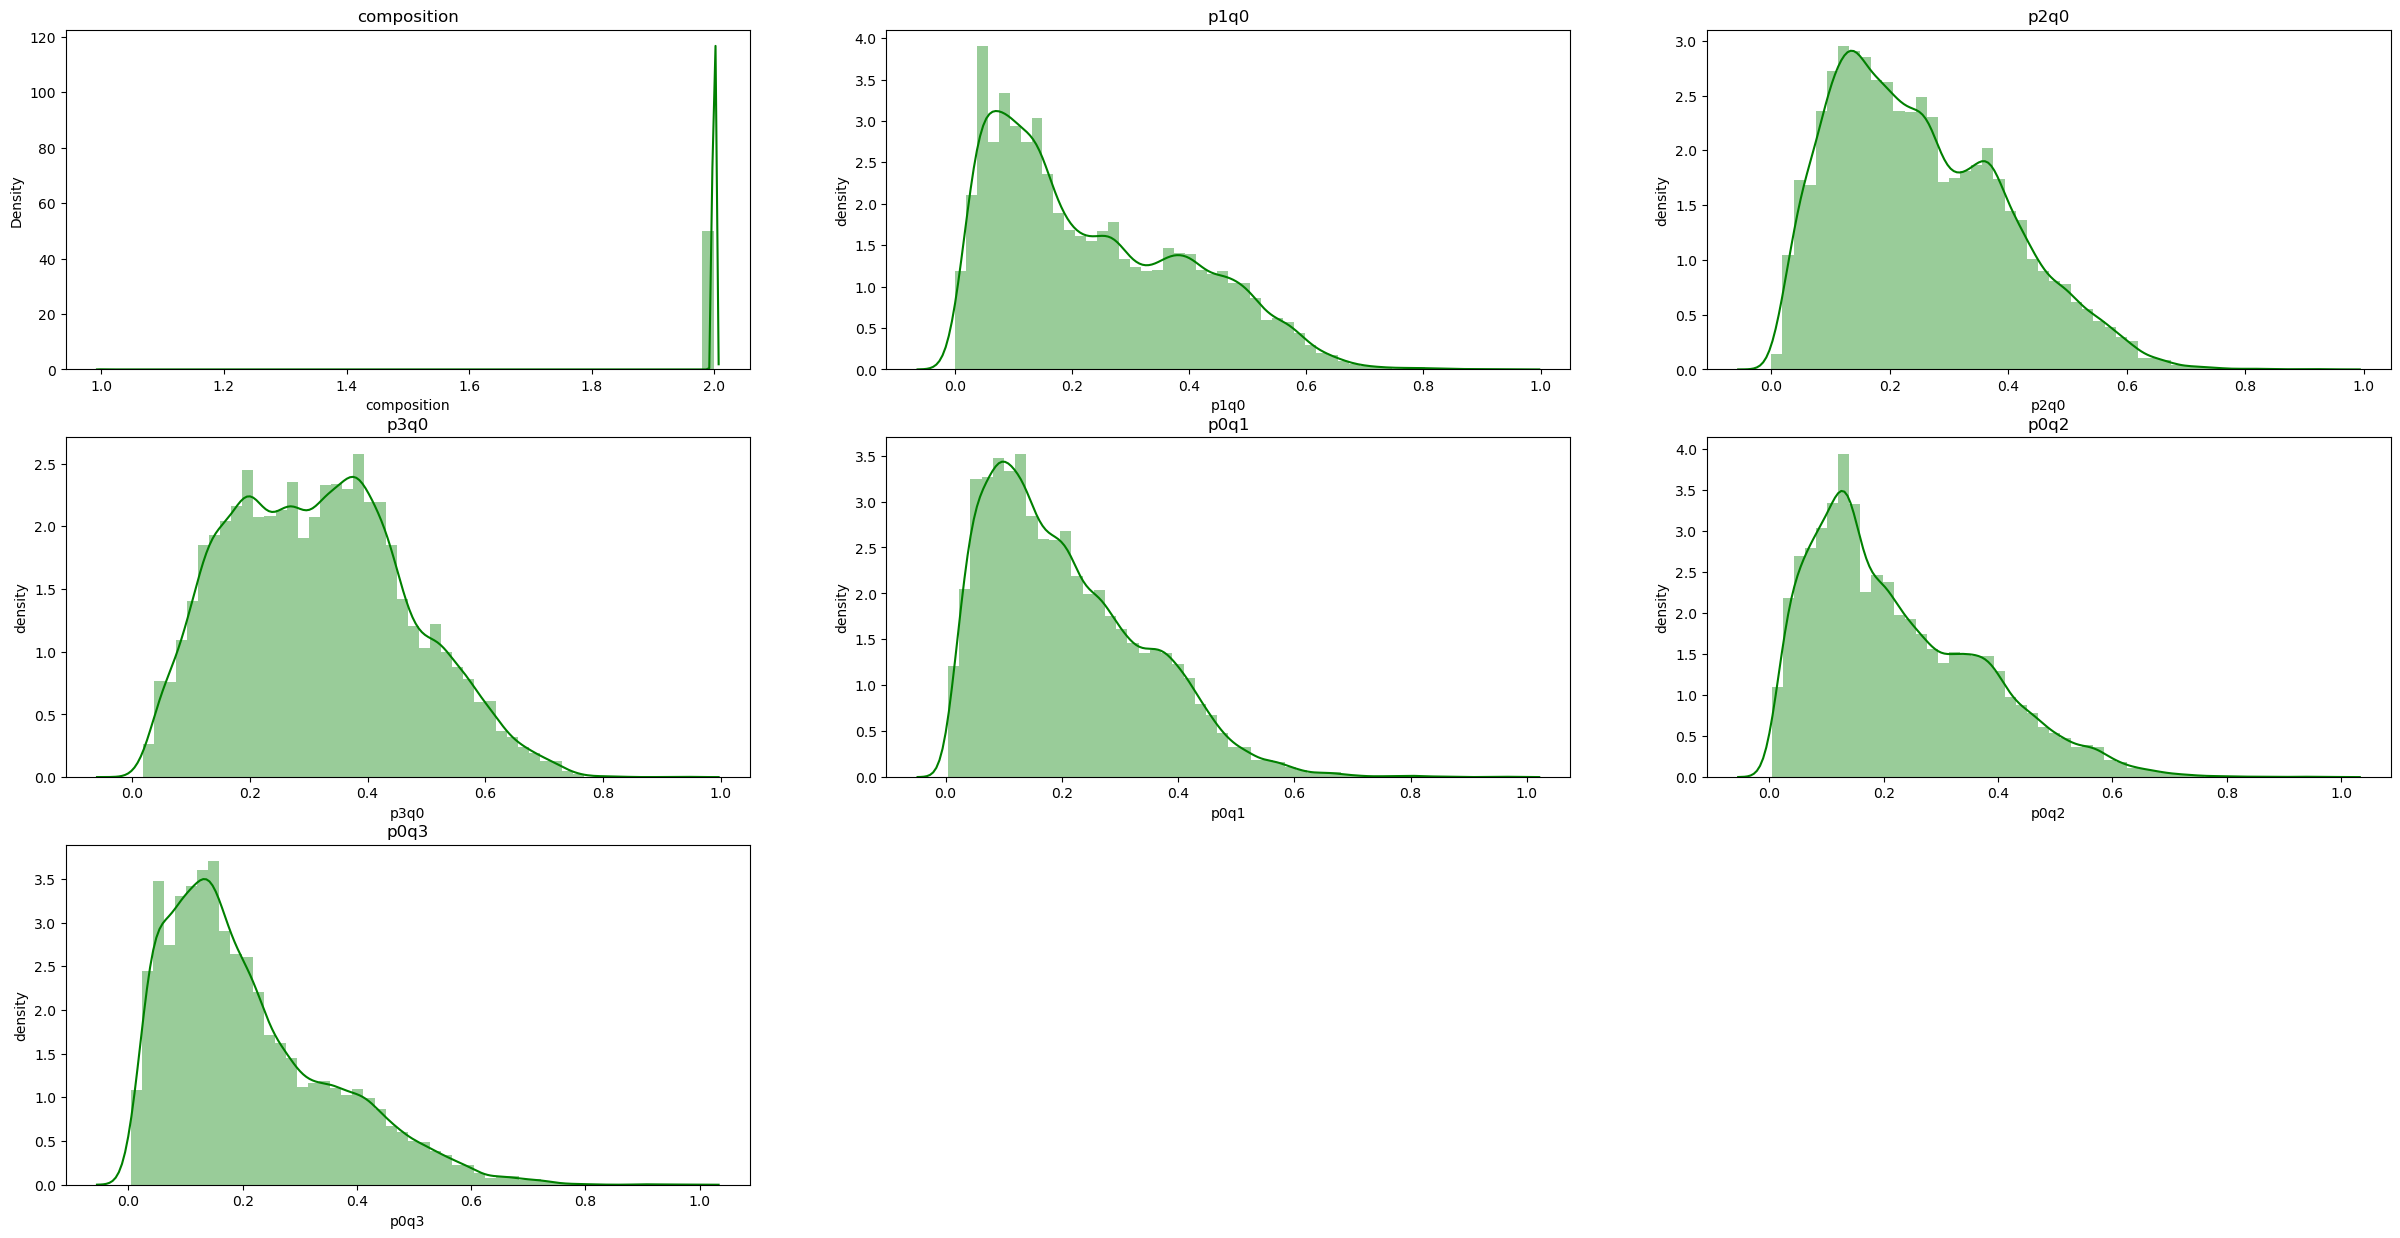

In [139]:
import seaborn as sns
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

data = X_train
plt.figure(figsize=(30,15))
plt.subplot(3, 3, 1)
sns.distplot(data['composition'], color='green')
plt.title("composition") 
plt.subplot(3, 3, 2)
sns.distplot(data['p1q0'], color='green')
plt.ylabel('density')
plt.title("p1q0")
plt.subplot(3, 3, 3)
sns.distplot(data['p2q0'], color='green')
plt.ylabel('density')
plt.title("p2q0")
plt.subplot(3, 3, 4)
sns.distplot(data['p3q0'], color='green')
plt.ylabel('density')
plt.title("p3q0")
plt.subplot(3, 3, 5)
sns.distplot(data['p0q1'], color='green')
plt.ylabel('density')
plt.title("p0q1")
plt.subplot(3, 3, 6)
sns.distplot(data['p0q2'], color='green')
plt.ylabel('density')
plt.title("p0q2")
plt.subplot(3, 3, 7)
sns.distplot(data['p0q3'], color='green')
plt.ylabel('density')
plt.title("p0q3")

plt.show()

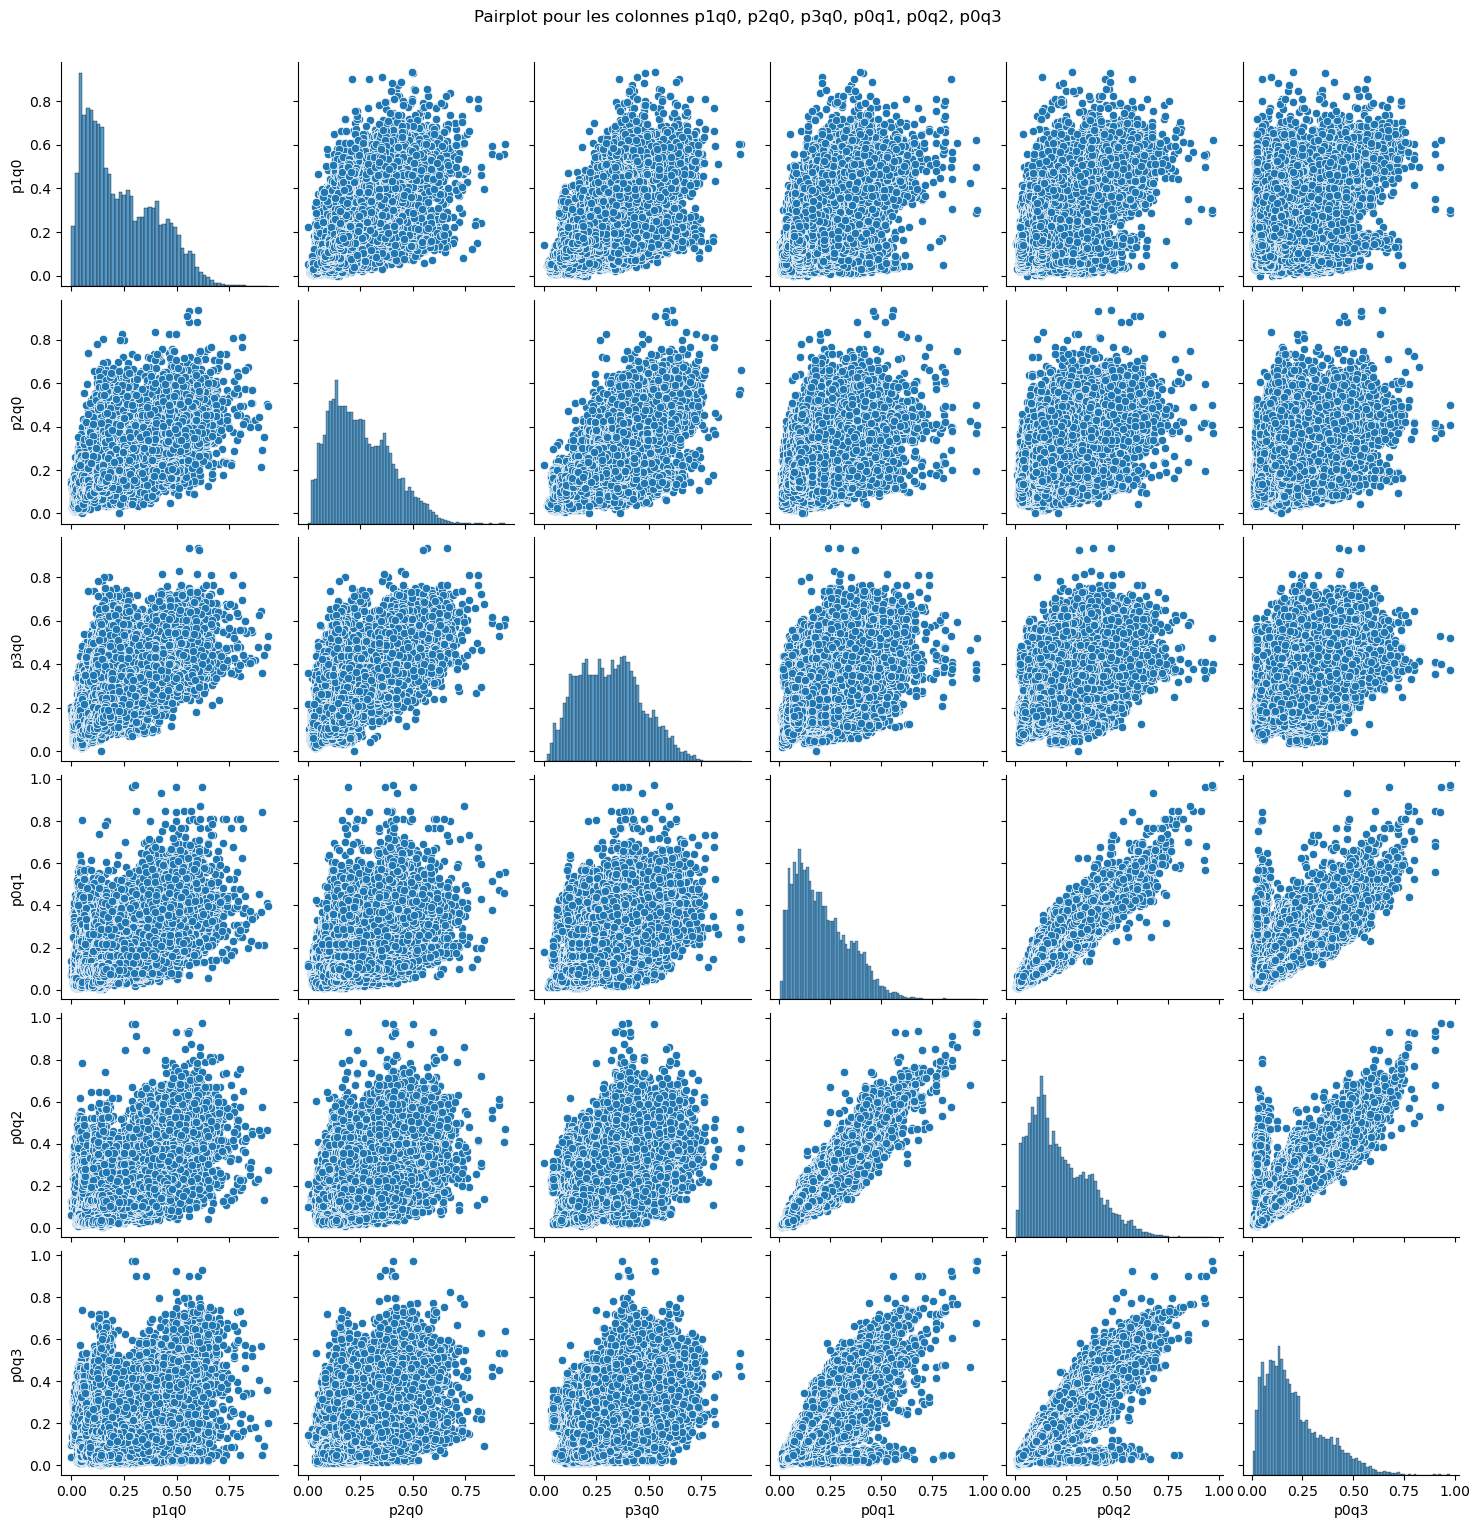

In [141]:


 
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

# Créer un pairplot
sns.pairplot(data[columns_to_plot])
plt.suptitle('Pairplot pour les colonnes p1q0, p2q0, p3q0, p0q1, p0q2, p0q3', y=1.02)
plt.show()


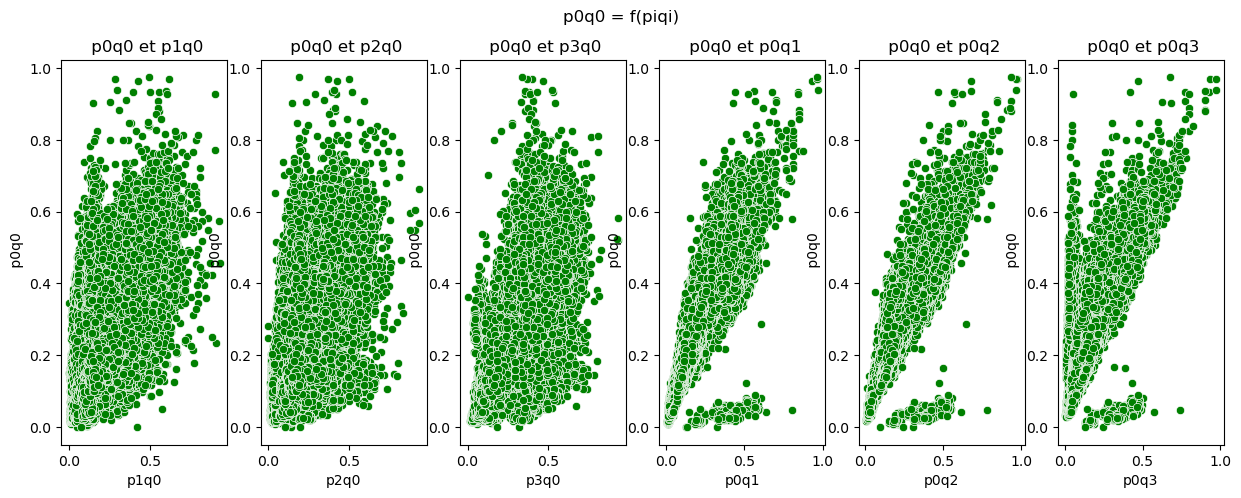

In [145]:
# Charger les données
#data = pd.read_csv("votre_fichier.csv")
Y_train_2 = pd.read_csv('Downloads/Ytrain_yL5OjS4.csv')


# Sélectionner les colonnes pertinentes
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

# Créer des sous-plots alignés dans la même ligne
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Tracer y_train en fonction des piqi pour chaque colonne
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=data[col], y=Y_train_2['p0q0'], ax=axes[i], color = 'green')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(' p0q0')
    axes[i].set_title(f' p0q0 et {col}')

# Afficher le titre global
plt.suptitle('p0q0 = f(piqi) ')

# Afficher les graphiques
plt.show()


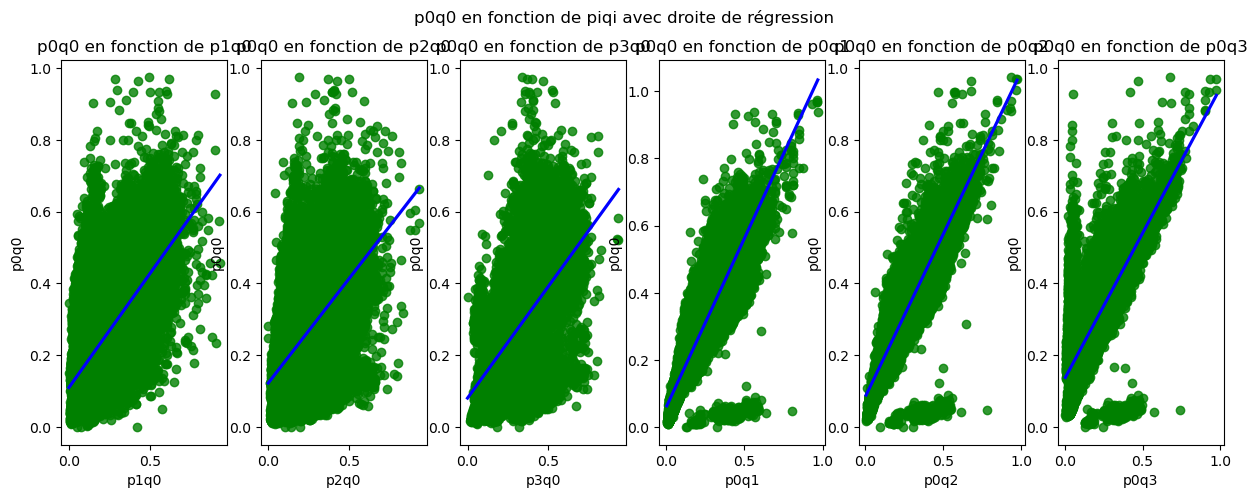

In [146]:

Y_train = pd.read_csv('Downloads/Ytrain_yL5OjS4.csv', index_col=0)
new_column = [f"{value - 1}" for value in Y_train.index]
Y_train.index = new_column
# Sélectionner les colonnes pertinentes
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

# Créer des sous-plots alignés dans la même ligne
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Tracer p0q0 en fonction de chaque piqi pour chaque colonne avec la droite de régression
for i, col in enumerate(columns_to_plot):
    sns.regplot(x=data[col], y=Y_train['p0q0'], ax=axes[i], color='green', scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('p0q0')
    axes[i].set_title(f'p0q0 en fonction de {col}')

# Afficher le titre global
plt.suptitle('p0q0 en fonction de piqi avec droite de régression')

# Afficher les graphiques
plt.show()


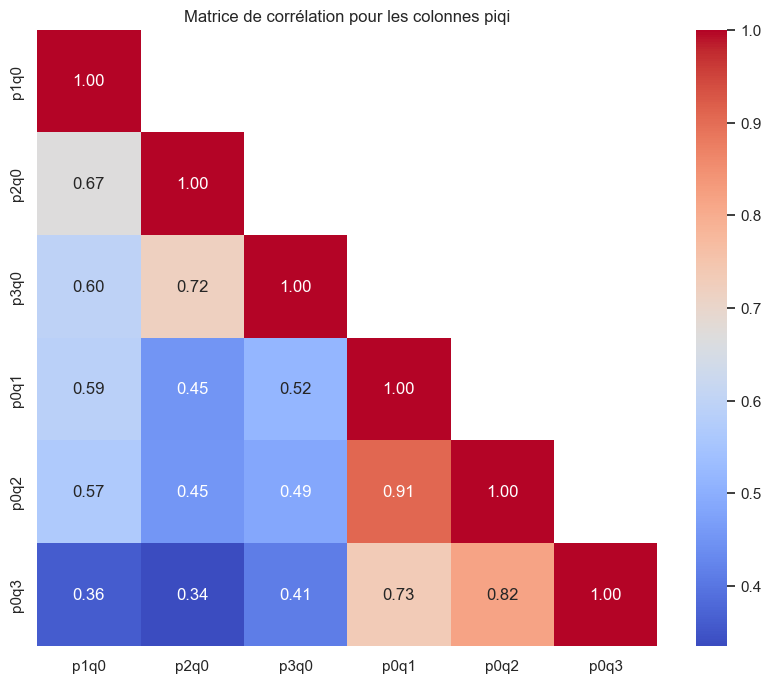

In [147]:
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']
 
correlation_matrix = data[columns_to_plot].corr()
sns.set(style="white")
mask = np.triu(correlation_matrix, k=1)  
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Matrice de corrélation pour les colonnes piqi')
plt.show()


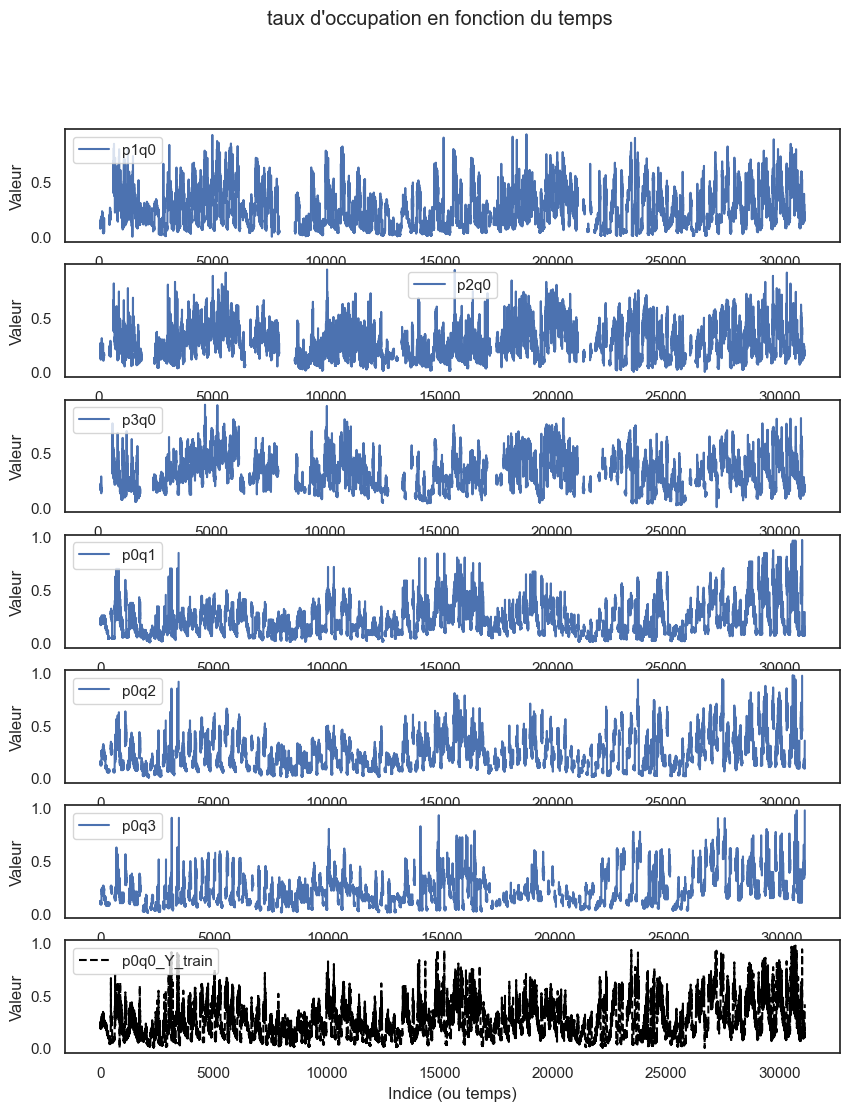

In [149]:

Y_train = pd.read_csv('Downloads/Ytrain_yL5OjS4.csv', index_col=0)
new_column = [f"{value - 1}" for value in Y_train.index]
Y_train.index = new_column

# Sélectionner les colonnes piqi ainsi que p0q0
columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

# Créer des sous-plots alignés
fig, axes = plt.subplots(len(columns_to_plot) + 1, 1, figsize=(10, 2*len(columns_to_plot)))

# Tracer la relation entre p0q0 et toutes les piqi en fonction de l'indice (ou du temps)
for i, column_to_plot in enumerate(columns_to_plot):
    axes[i].plot(data.index, data[column_to_plot], label=column_to_plot)
    axes[i].set_ylabel('Valeur')
    axes[i].legend()
 
axes[-1].plot(data.index, Y_train['p0q0'], label='p0q0_Y_train', linestyle='--', color='black')
axes[-1].set_xlabel('Indice (ou temps)')
axes[-1].set_ylabel('Valeur')
axes[-1].legend()

# Ajouter un titre global
plt.suptitle("taux d'occupation en fonction du temps")
plt.show()


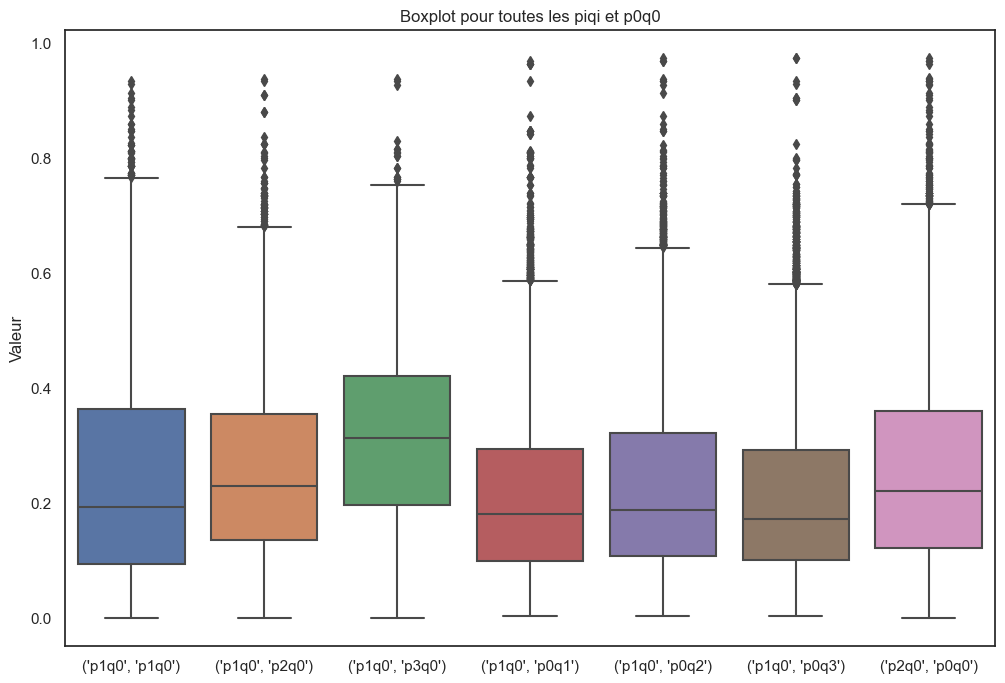

In [150]:

Y_train = pd.read_csv('Downloads/Ytrain_yL5OjS4.csv', index_col=0)
new_column = [f"{value - 1}" for value in Y_train.index]
Y_train.index = new_column

columns_to_plot = ['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.concat([data[columns_to_plot], Y_train['p0q0']], axis=1, keys=columns_to_plot + ['p0q0']))
plt.title('Boxplot pour toutes les piqi et p0q0')
plt.ylabel('Valeur')
plt.show()


# 3) FEATURE ENGINEERING 

Pour extraire des informations de la colonne, nous avons décidé de la convertir en jour de la semaine d'une façon ordonnée. 0 pour le lundi et 6 pour dimanche. 

In [7]:
import datetime
date = X_train['date'].values
Z = []
for k in date:
    year = int(k[0:4])
    month = int(k[5:7])
    day = int(k[8:])
    Z.append(datetime.datetime(year,month,day).weekday())
X_train['date'] = Z

In [8]:
date = X_test['date'].values
Z = []
for k in date:
    year = int(k[0:4])
    month = int(k[5:7])
    day = int(k[8:])
    Z.append(datetime.datetime(year,month,day).weekday())
X_test['date'] = Z

Il sera judicieux de retirer les colonnes way et composition, en effet la colonne way ne prend qu'une seule valeur unique, que ça soit pour le X_train ou le X_test. De plus, la colonne composition présente peu de valeurs différentes dans le X_train, représentant un ratio de 11/30000, et le X_test ne contient que les valeurs dominantes de la colonne composition.

In [9]:
X_train_1 = X_train.drop(labels=['way', 'composition'], axis = 1)

Les heures seront converties en entiers pour être compatibles avec nos modèles. Nous veillerons à préserver l'ordre établi par les heures, ce qui sera utile ultérieurement. Il est à noter que "11:00:00" a été remplacé par la même valeur que "08:00:00". Dans la section d'analyse des données, nous avons constaté qu'il n'y a que 2 lignes avec la valeur "11:00:00". En les examinant, nous avons soupçonné une faute de frappe. En effet, les données d'entraînement présentent un certain ordre, notamment pour la colonne heure, où la valeur "11:00:00" était regroupée avec "08:00:00". Par conséquent, nous avons décidé de la remplacer.

In [10]:
mapp = {"06:00:00": int(0) ,"07:00:00":int(1), "08:00:00":int(2), "09:00:00":int(3), "11:00:00":int(2)}
X_train_1 = X_train_1.replace(mapp)

X_train_1['hour'] = X_train_1['hour'].astype('Int64', errors= 'ignore')


On convertit les valeurs de la colonne station tout en conservant l'ordre des stations.

In [11]:
m = len(stations)
S = [k for k in range(m)]
map_station = dict(zip(stations,S))
X_train_1 = X_train_1.replace(map_station)
X_train_1

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,0,1,3,0,NaN,NaN,NaN,0.201,0.138,0.091
1,1,1,3,0,NaN,NaN,NaN,0.204,0.152,0.106
2,3,1,3,0,NaN,NaN,NaN,0.213,0.153,0.111
3,4,1,3,0,NaN,NaN,NaN,0.213,0.152,0.108
4,0,1,3,0,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...
31114,0,9,30,2,0.152,0.18860,0.157000,0.080,0.100,NaN
31115,1,9,30,2,0.153,0.18040,0.191000,0.089,0.121,NaN
31116,2,9,30,2,0.166,0.14900,0.168000,0.099,0.129,NaN
31117,3,9,30,2,0.182,0.19300,0.162000,0.074,0.101,NaN


# 4) Filling missing values X_train

En examinant les données, nous avons remarqué qu'elles présentent un certain ordre, notamment pour la colonne heure. Nous avons donc décidé de remplir les données manquantes en utilisant une méthode de backfill qui prendra la valeur non NA suivante.

In [12]:
X_train_1['hour'] = X_train_1['hour'].fillna(method = 'bfill')
X_train_1.isnull().sum()

date          0
train         0
station       0
hour          0
p1q0       2052
p2q0       4145
p3q0       6184
p0q1       3202
p0q2       6399
p0q3       9592
dtype: int64

Par ailleurs, pour les colonnes $p_{train}q_{station}$, on utilisera un knn imputer basé sur la méthode des k plus proches voisins.

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, weights="uniform")

X_train_2 = imputer.fit_transform(X_train_1)


In [14]:
X_train_1[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']] = X_train_2[:, 4:]


On crée une colonne train_station et hour_station.

In [15]:
X_train_1['train_station'] = X_train_1['train'].astype(str) + '_' + X_train_1['station'].astype(str)
X_train_1.head()

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,train_station
0,0,1,3,0,0.21496,0.257445,0.275167,0.201,0.138,0.091,1_3
1,1,1,3,0,0.22066,0.268900,0.315400,0.204,0.152,0.106,1_3
2,3,1,3,0,0.22180,0.257023,0.303385,0.213,0.153,0.111,1_3
3,4,1,3,0,0.20760,0.256000,0.289792,0.213,0.152,0.108,1_3
4,0,1,3,0,0.21496,0.257445,0.275167,0.210,0.147,0.096,1_3


# 5) Dummy coding X_train

In [78]:
df = X_train_1.copy()

In [79]:
dummy_df = pd.get_dummies(X_train_1['hour'], prefix='hour')
dummy_df = dummy_df.astype(int)
df = pd.concat([df.drop(columns=['hour']), dummy_df], axis=1)

In [80]:
dummy_df = pd.get_dummies(X_train_1['train_station'], prefix='train_station')
dummy_df = dummy_df.astype(int)
df = pd.concat([df.drop(columns=['train_station']), dummy_df], axis=1)

In [81]:
dummy_df = pd.get_dummies(X_train_1['station'], prefix='station')
dummy_df = dummy_df.astype(int)
df = pd.concat([df.drop(columns=['station']), dummy_df], axis=1)

In [82]:
dummy_df = pd.get_dummies(X_train_1['train'], prefix='train')
dummy_df = dummy_df.astype(int)
df = pd.concat([df.drop(columns=['train']), dummy_df], axis=1)

In [83]:
dummy_df = pd.get_dummies(X_train_1['date'], prefix='date')
dummy_df = dummy_df.astype(int)
df = pd.concat([df.drop(columns=['date']), dummy_df], axis=1)

In [22]:
df.head()

,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,hour_0,hour_1,hour_2,hour_3,...,train_51,train_52,train_53,train_54,train_55,date_0,date_1,date_2,date_3,date_4
0,0.21496,0.257445,0.275167,0.201,0.138,0.091,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22066,0.268900,0.315400,0.204,0.152,0.106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.22180,0.257023,0.303385,0.213,0.153,0.111,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.20760,0.256000,0.289792,0.213,0.152,0.108,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.21496,0.257445,0.275167,0.210,0.147,0.096,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 6) Ridge with group_by

Dans cette partie, on va appliquer un modèle Ridge à chaque sous partie des données groupé par le couple (train, station)

In [220]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [221]:
df_RG = X_train_1.copy()

In [222]:
dummy_df = pd.get_dummies(X_train_1['hour'], prefix='hour')
dummy_df = dummy_df.astype(int)
df_RG = pd.concat([df_RG.drop(columns=['hour']), dummy_df], axis=1)

dummy_df = pd.get_dummies(X_train_1['date'], prefix='date')
dummy_df = dummy_df.astype(int)
df_RG = pd.concat([df_RG.drop(columns=['date']), dummy_df], axis=1)

In [223]:
df_RG = df_RG.drop(columns = ['train_station'])

In [224]:
data = df_RG.copy()

In [225]:
data_grouped = data.groupby(['train', 'station'])

In [226]:
group_train =[]

for group_name, group_data in data_grouped :
    group_train.append(group_data.drop(columns = ['train', 'station']))


In [227]:
Y = []
for xx in group_train:
    Y.append(Y_train_1.iloc[xx.index])

In [228]:
df_ts = X_test_1.drop(columns = ['train_station']).copy()

In [229]:
dummy_df = pd.get_dummies(X_train_1['hour'], prefix='hour')
dummy_df = dummy_df.astype(int)
df_ts = pd.concat([df_ts.drop(columns=['hour']), dummy_df], axis=1)

dummy_df = pd.get_dummies(X_train_1['date'], prefix='date')
dummy_df = dummy_df.astype(int)
df_ts = pd.concat([df_ts.drop(columns=['date']), dummy_df], axis=1)

In [230]:
datas = df_ts.copy()

In [231]:
data_groupedts = datas.groupby(['train', 'station'])

In [232]:
group_s =[]
indice = np.array([])
for group_name, group_data in data_groupedts :
    group_s.append(group_data.drop(columns = ['train', 'station']))
    indice = np.concatenate((indice, group_data.index) )
    

In [234]:
X = group_train
RG = []
Scalers_RG = []
for k in range(len(X)) : 
    Scaler = StandardScaler().fit(X[k].loc[: , 'p1q0':'p0q3'])
    Scalers_RG.append(Scaler)
    X3 = Scaler.transform(X[k].loc[: , 'p1q0':'p0q3'])
    XT = X[k].copy()
    XT.loc[: , 'p1q0':'p0q3'] = X3
    LM.append(Ridge().fit(XT, Y[k]))


In [235]:
Y_test = np.array([])
XS  = group_s
for k in range(len(group_s)) : 
    X3 = Scalers_LM[k].transform(XS[k].loc[: , 'p1q0':'p0q3'])
    XAT = XS[k].copy()
    XAT.loc[: , 'p1q0':'p0q3'] = X3
    Y_test = np.concatenate((Y_test, LM[k].predict(XAT)))
 

In [238]:
predictions = Y_test.copy()
predictions_df = pd.DataFrame(predictions, columns=['predicted_column'])
predictions_df['original_index'] = indice
predictions_df_sorted = predictions_df.sort_values(by='original_index')
Y_test = predictions_df_sorted.values


In [239]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test[:,0]
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test_RG.csv')


# 7) TEST AND Y_TRAIN

Importer le Y_train.

In [94]:
from sklearn.linear_model import LinearRegression

Y_train = pd.read_csv('Downloads/Ytrain_yL5OjS4.csv')
Y_train.shape
Y_train_1 = Y_train['p0q0']


Créer une copie de X_test.

In [28]:
X_test_1 = X_test.copy()


Convertir les valeurs de la colonne heure et retirer les colonnes way et composition.

In [29]:
mapp = {"06:00:00": 0 ,"07:00:00":1, "08:00:00":2, "09:00:00":3}
X_test_1 = X_test_1.replace(mapp)
X_test_1 = X_test_1.drop(columns = ['way', 'composition'])


In [30]:
m = len(stations)
S = [k for k in range(m)]
map_stations = dict(zip(stations,S))
X_test_1 = X_test_1.replace(map_stations)

Remplir les valeurs manquantes de la colonne heure par la méthode backfill

In [31]:
X_test_1['hour'] = X_test_1['hour'].fillna(method = 'bfill')


In [32]:
X_test_1['hour'] = X_test_1['hour'].astype(int)

Appliquer le même imputer sur le X_test pour éviter une diminution de performance.

In [33]:
X_test_3 = imputer.transform(X_test_1)


In [34]:
X_test_1[['p1q0','p2q0','p3q0','p0q1','p0q2','p0q3']] = X_test_3[:, 4:]


In [35]:
X_test_1.isnull().sum()

date       0
train      0
station    0
hour       0
p1q0       0
p2q0       0
p3q0       0
p0q1       0
p0q2       0
p0q3       0
dtype: int64

Créer les colonnes train_station et hour_station.

In [36]:
X_test_1['train_station'] = X_test_1['train'].astype(str) + '_' + X_test_1['station'].astype(str)
X_test_1.head()

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,train_station
0,1,1,3,0,0.22066,0.268900,0.315400,0.226,0.165,0.128,1_3
1,2,1,3,0,0.22330,0.270405,0.309342,0.221,0.159,0.114,1_3
2,0,1,3,0,0.21516,0.257445,0.275167,0.227,0.175,0.133,1_3
3,2,1,3,0,0.22330,0.270405,0.309342,0.200,0.148,0.105,1_3
4,0,1,3,0,0.21516,0.257445,0.275167,0.221,0.169,0.126,1_3


# 8) Dummy coding X_test

In [84]:
df_1 = X_test_1.copy()
dummy_df_1 = pd.get_dummies(X_test_1['hour'].astype(int), prefix='hour')
dummy_df_1 = dummy_df_1.astype(int)
df_1 = pd.concat([df_1.drop(columns=['hour']), dummy_df_1], axis=1)

In [85]:
dummy_df_1 = pd.get_dummies(X_test_1['train_station'], prefix='train_station')
dummy_df_1 = dummy_df_1.astype(int)
df_1 = pd.concat([df_1.drop(columns=['train_station']), dummy_df_1], axis=1)

In [86]:
dummy_df_1 = pd.get_dummies(X_test_1['station'], prefix='station')
dummy_df_1 = dummy_df_1.astype(int)
df_1 = pd.concat([df_1.drop(columns=['station']), dummy_df_1], axis=1)


In [87]:
dummy_df_1 = pd.get_dummies(X_test_1['train'], prefix='train')
dummy_df_1 = dummy_df_1.astype(int)
df_1 = pd.concat([df_1.drop(columns=['train']), dummy_df_1], axis=1)

In [88]:
dummy_df_1 = pd.get_dummies(X_test_1['date'], prefix='date')
dummy_df_1 = dummy_df_1.astype(int)
df_1 = pd.concat([df_1.drop(columns=['date']), dummy_df_1], axis=1)

Vérifier que les 2 dataframes ont les mêmes colonnes

In [155]:
sab = list(set(df.columns) - set(df_1.columns))
sab

[]

Les deux dataframes ont bien les mêmes colonnes mais pas nécessairement le même ordre. On permutera donc les colonnes de df_1 pour avoir le bon ordre. 

In [43]:
df_1 = df_1[df.columns]


# 9) SPLIT TRAIN VALIDATION

In [38]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(df, Y_train_1 , stratify= df[['hour_0', 'hour_1','hour_2','hour_3']],test_size=0.20, random_state=36)

# 10) DEEP LEARNING AND DATA NORMALIZATION

In [73]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Normaliser les colonnes  $p_{train}q_{station}$.

In [40]:
from sklearn.preprocessing import StandardScaler
Scaler_1 = StandardScaler().fit(X_tr.loc[: , 'p1q0':'p0q3'])
X_tr_1 = Scaler_1.transform(X_tr.loc[: , 'p1q0':'p0q3'])
X_tr.loc[: , 'p1q0':'p0q3'] = X_tr_1

In [41]:
X_ts_1 = Scaler_1.transform(X_ts.loc[: , 'p1q0':'p0q3'])
X_ts.loc[: , 'p1q0':'p0q3'] = X_ts_1

In [74]:
model = Sequential()
model.add(Dense(units= 256, activation='relu', input_dim=647))
model.add(Dense(units= 256, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_absolute_error')



In [ ]:
history = model.fit(X_tr, y_tr, validation_data=(X_ts, y_ts),epochs=80, batch_size=20, shuffle = True, verbose=False)

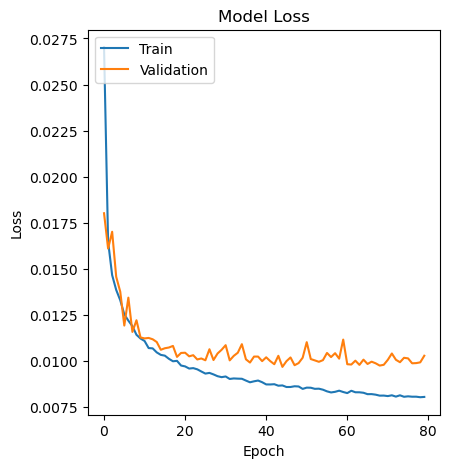

In [83]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

Normaliser les colonnes $p_{train}q_{station}$ pour le dataframe d'entrainnement df et lui appliquer le modèle. 

In [90]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler().fit(df.loc[: , 'p1q0':'p0q3'])
df_copy_1 = Scaler.transform(df.loc[: , 'p1q0':'p0q3'])
df_copy = df.copy()
df_copy.loc[: , 'p1q0':'p0q3'] = df_copy_1

In [75]:
model = Sequential()
model.add(Dense(units= 256, activation='relu', input_dim=647))
model.add(Dense(units= 256, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_absolute_error')


In [89]:
model.fit(df_copy, Y_train_1, epochs=60, batch_size=20, shuffle = True , verbose=False)

Normaliser les colonnes $p_{train}q_{station}$ du dataframe du test df_1. 

In [91]:
df_copy_2 = Scaler.transform(df_1.loc[: , 'p1q0':'p0q3'])
df_copy_ts = df_1.copy()
df_copy_ts.loc[: , 'p1q0':'p0q3'] = df_copy_2

In [52]:
Y_test = model.predict(df_copy_ts)

430/430 [==============================] - 1s 2ms/step


Sauvegarder le Y_test pour le déposer sur le site challenge data.

In [53]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test[:,0]
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test.csv')


# 11) LSTM

In [92]:
df_train = (df_copy.to_numpy()).reshape((df_copy.shape[0], 1, df_copy.shape[1]))
df_test = (df_copy_ts.to_numpy()).reshape((df_copy_ts.shape[0], 1, df_copy_ts.shape[1]))

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.initialized = False

    def build(self, input_shape):
        if not self.initialized:
            self.lstm_layer = LSTM(256, activation='relu', input_shape=(input_shape[1], input_shape[2]))
            self.dense_layer = Dense(1)
            self.initialized = True

    def call(self, inputs):
        x = self.lstm_layer(inputs)
        return self.dense_layer(x)

model = MyModel()

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(df_train, Y_train_1, epochs=50, batch_size=20, shuffle=True, verbose= False)


In [104]:
Y_test = model.predict(df_test)

430/430 [==============================] - 2s 4ms/step


In [105]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test[:, 0]
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test_3.csv')

# 12) LINEAR REGRESSION AND REGULARIZATION

### Linear regression

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

LM = LinearRegression().fit(X_tr, y_tr)

In [55]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, LM.predict(X_ts))

0.011720452756072683

In [56]:
LM = LinearRegression().fit(df_copy, Y_train_1)

In [57]:
Y_test = LM.predict(df_copy_ts)


In [58]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test.csv')

### Ridge

In [47]:
RDG = Ridge().fit(X_tr, y_tr)


In [61]:
mean_absolute_error(y_ts, RDG.predict(X_ts))

0.01183033650124168

In [59]:
RDG = Ridge().fit(df_copy, Y_train_1)


In [60]:
Y_test = RDG.predict(df_copy_ts)


In [61]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test.csv')

# 13) Random Forest Regressor

Créer des copies X_train_2 et X_test_2

In [240]:
X_train_2 = X_train_1.copy()

In [241]:
X_test_2 = X_test_1.copy()

Il faudra convertir les valeurs de la colonne train_station.

In [242]:
t_s = np.unique(X_train_2['train_station'].values)


Pareil pour le X_test_2.

In [243]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(t_s)
X_train_2['train_station'] = LE.transform(X_train_2['train_station'])
X_train_2.head()

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,train_station
0,0,1,3,0,0.21496,0.257445,0.275167,0.201,0.138,0.091,101
1,1,1,3,0,0.22066,0.268900,0.315400,0.204,0.152,0.106,101
2,3,1,3,0,0.22180,0.257023,0.303385,0.213,0.153,0.111,101
3,4,1,3,0,0.20760,0.256000,0.289792,0.213,0.152,0.108,101
4,0,1,3,0,0.21496,0.257445,0.275167,0.210,0.147,0.096,101


In [244]:
X_test_2['train_station'] = LE.transform(X_test_2['train_station'])
X_test_2.head()

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,train_station
0,1,1,3,0,0.22066,0.268900,0.315400,0.226,0.165,0.128,101
1,2,1,3,0,0.22330,0.270405,0.309342,0.221,0.159,0.114,101
2,0,1,3,0,0.21516,0.257445,0.275167,0.227,0.175,0.133,101
3,2,1,3,0,0.22330,0.270405,0.309342,0.200,0.148,0.105,101
4,0,1,3,0,0.21516,0.257445,0.275167,0.221,0.169,0.126,101


In [245]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators" : [10, 40, 60, 100]}
GS = GridSearchCV(RandomForestRegressor(), param_grid= parameters)
GS.fit(X_train_2, Y_train_1)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 40, 60, 100]})

In [79]:
GS.best_params_

{'n_estimators': 100}

In [248]:
RF = RandomForestRegressor(n_estimators=100 ,random_state= 42).fit(X_train_2, Y_train_1)

In [247]:
Y_test = RF.predict(X_test_2)

In [34]:
L = [k+1 for k in range(len(Y_test))]
Z = Y_test
Y_test = pd.DataFrame(data = {'p0q0' : Z}, index = L)

Y_test.to_csv('Downloads/Y_test_1.csv')